<a href="https://colab.research.google.com/github/choiboy92/ImperialML/blob/main/Tutorial%206/Tutorial_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

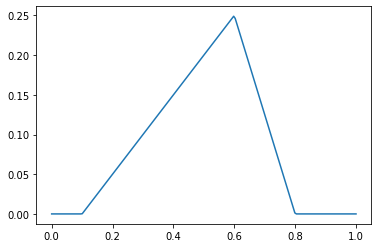

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 200)

#set up a function of x 
y = x.copy() 
#^ note that we don't actually end up using y = x 
# anywhere, but it does set up the array
y[x < 0.1] = 0 #y = 0 for x < 0.1
y[x >= 0.1] = 0.5*(x[x >= 0.1]-0.1) #add a gradient of +0.5 if x >= 0.5
y[x >= 0.6] = 0.25-0.25/0.2*(x[x >= 0.6]-0.6) 
#^ gradient downwards from 0.6 to 0.8 (gradient 
#calculated so that line goes from 
#(0.6, 0.25) -> (0.8, 0), i.e. joins up with the other segments)
y[x > 0.8] = 0 #y = 0 for x > 0.8

fig, ax = plt.subplots() 
plt.plot(x,y)

Epoch 1/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.0329
Epoch 2/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 3/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 4/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 5/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 6/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 7/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 8/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 9/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 10/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 11/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 12/2000
7/7 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 13/2000
7/7 [==============================

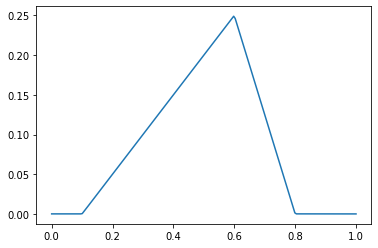

In [4]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

#set up a sequential neural network
model = Sequential()

#add a layer of 3 nodes of ReLUs, taking a single parametric input
# when units = 150 --> more complexity --> better able to avoid local minima
model.add(Dense(units=3, activation='relu', input_dim=1))
#add a linear node at the end to combine the nodes together
model.add(Dense(units=1, activation='linear'))

#compile the model, trying to minimise mean squared 
#error and using the Adam algorithm to fit this
model.compile(loss="mean_squared_error",
              optimizer='adam')

#fit the data provided previously, using 200 epochs and a batch size of 32
# when epochs = 2000 --> more complexity --> better able to avoid local minima
model.fit(x, y, epochs=200, batch_size=32)

#obtain a predicted set of values from the fitted function along its length
y_pred = model.predict(x)
plt.plot(x,y_pred)

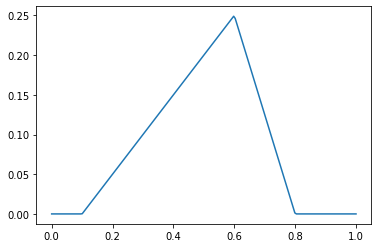

In [3]:
# manually adjust weights to generate the correct output
model.layers[0].set_weights([np.array([[0.5, -(-0.5-0.25/0.2), 0.25/0.2]],), np.array([-0.5*0.1, (-0.5-0.25/0.2)*0.6, -(0.25/0.2)*0.8],)]) 
model.layers[1].set_weights([np.array([[1],[-1],[1]],), np.array([0],)])
y_pred = model.predict(x)
plt.plot(x,y_pred)